In [2]:
import numpy as np
from matplotlib import pyplot as plt

In [3]:
def inst_forcing(C = None, N = None, M = None, C0 = 284., N0 = 273., M0 = 808.): 
    """
    Calculates the radiative forcing of CO2, N2O and CH4 according to Etminam et al., 2016.
    
    C = co2 in ppm, N = n2o in ppb, M = ch4 in ppb
    """

    if C is None: C = C0
    if N is None: N = N0
    if M is None: M = M0

    a1 = -2.4e-7
    b1 = 7.2e-4
    c1 = -2.1e-4

    a2 = -8.0e-6
    b2 = 4.2e-6
    c2 = -4.9e-6

    a3 = -1.3e-6
    b3 = -8.2e-6

    F_co2 = (a1 * (C-C0)**2 + b1 * abs(C-C0) + c1*0.5*(N+N0) + 5.36) * np.log(C/C0)

    F_n2o = (a2*(C+C0)/2 + b2 * (N+N0)/2 + c2 * (M+M0)/2 + 0.117) * (np.sqrt(N)-np.sqrt(N0))

    F_ch4 = (a3*(M+M0)/2 + b3 * (N+N0)/2 + 0.043) * (np.sqrt(M)-np.sqrt(M0))

    return F_co2+F_n2o+F_ch4, F_co2, F_n2o, F_ch4


In [4]:
bott_vals = np.array([
    [284, 354, 432, 563, 691, 864, 1135],
    [273, 309, 336, 358, 370, 380, 392],
    [808, 1717, 1954, 2446, 2651, 2652, 2415]
]).T

In [5]:
forcs = []
forcs_co2 = []
for bo in bott_vals:
    fo = inst_forcing(*bo)
    print(fo[0])
    forcs.append(fo[0])
    forcs_co2.append(fo[1])

0.0
1.8009770539914227
3.071080258136722
4.809206138276391
6.097620739943365
7.453322621206508
9.071545125162451


In [10]:
forcs = np.array(forcs)
forcs_co2 = np.array(forcs_co2)

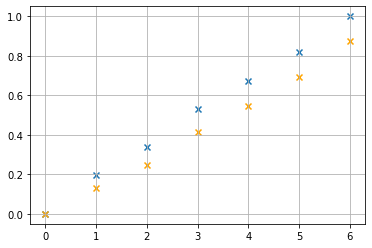

In [6]:
%matplotlib inline

plt.scatter(np.arange(len(forcs)), forcs/forcs[-1], marker = 'x')
plt.scatter(np.arange(len(forcs)), forcs_co2/forcs[-1], marker = 'x', color = 'orange')
plt.grid()

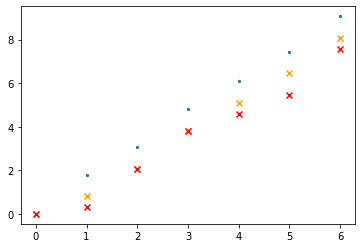

In [7]:
aers = np.array([0] + 6*[-1.])
aers2 = np.array([0] + [-1.5, -1., -1., -1.5, -2., -1.5])

plt.scatter(np.arange(len(forcs)), forcs, marker = 'o', s = 5)
plt.scatter(np.arange(len(forcs)), forcs+aers, marker = 'x', color = 'orange')
plt.scatter(np.arange(len(forcs)), forcs+aers2, marker = 'x', color = 'red')

In [11]:
delta_T = np.array([1.4, 2.9, 4.9, 6.6, 8.1, 9.6])
N_fin = np.array([0.14, 0.23, 0.22, 0.33, 0.25, 0.33])

lamb0 = -(forcs[1:] - N_fin)/delta_T
lamb05 = -(forcs[1:] - 0.5 - N_fin)/delta_T
lamb1 = -(forcs[1:] - 1. - N_fin)/delta_T
lamb2 = -(forcs[1:] - 1.5 - N_fin)/delta_T

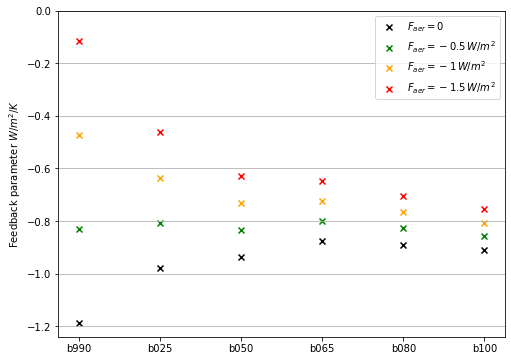

In [12]:
cart = '/home/fabiano/Research/lavori/BOTTINO/nonlin_evol_1000/'

fig, ax = plt.subplots(figsize = (8,6))

ax.scatter(range(6), lamb0, marker = 'x', color = 'black', label = r'$F_{aer} = 0$')
ax.scatter(range(6), lamb05, marker = 'x', color = 'green', label = r'$F_{aer} =  -0.5\, W/m^2$')
ax.scatter(range(6), lamb1, marker = 'x', color = 'orange', label = r'$F_{aer} = -1\, W/m^2$')
ax.scatter(range(6), lamb2, marker = 'x', color = 'red', label = r'$F_{aer} = -1.5\, W/m^2$')
ax.legend()

ax.set_xticks(np.arange(6))
ax.set_xticklabels(['b990', 'b025', 'b050', 'b065', 'b080', 'b100'])
ax.grid(axis = 'y')
ax.set_ylim([None, 0.])

ax.set_ylabel(r'Feedback parameter $W/m^2/K$')

fig.savefig(cart + 'feedback_w_aerforc.pdf')


In [ ]:
0.3/0.22

1.3636363636363635

### Notes su aerosol ERF

- Fiedler sottostima aer ERF rispetto a AR6 (-0.5 contro -1)
- Da Fiedler, l'aer $\tau$ sale da 0.022 circa nel 2000 a 0.03 nel 2060-70 e poi riscende sotto 0.02 nel 2100.
- Quindi sarebbe circa -1.3 wm2 nel 2060, e un po' sotto 1 nel 2100

In [13]:
def lamb(F_ghg, F_aer, l1, l2):
    deltaT = -F_ghg/l1 -F_aer/l2
    return -(F_ghg + F_aer)/deltaT

In [31]:
lamb(1.8, -1.1, -0.7, -2)

-0.3462897526501767